# Week 3 Lab: Introduction to Tables

This week's lab will introduce tables, which are object types that represent data sets. 

According to the Data 8 textbook, "A table can be viewed in two ways: a sequence of named columns that each describe a single aspect of all entries in a data set, or a sequence of rows that each contain all information about a single entry in a data set." More information can be found in [Chapter 6](https://www.inferentialthinking.com/chapters/06/Tables) of the Data 8 textbook.

In [1]:
import numpy as np
from datascience import *

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## 1. Creating a Table

### 1.1 Using Arrays

Looking at the first description of a table, we are going to combine two arrays and create a table. As a reminder, the "make_array" function creates an array, and the Table() function create a new table. It is important to import the datascience module in order to use the Table() function- it is not native to Python.

Another useful function to utilze when creating a table is with_columns(). This allows existing arrays to become a table. with_columns takes in two arguments: ("Label", array). 

In [2]:
political_parties = make_array("Democrat", "Republican")
political_parties

array(['Democrat', 'Republican'], dtype='<U10')

In [3]:
party_founders = make_array("Andrew Jackson", "Abraham Lincoln")
party_founders

array(['Andrew Jackson', 'Abraham Lincoln'], dtype='<U15')

In [4]:
parties = Table().with_columns("Parties", political_parties,
                              "Presidents", party_founders)
parties

Parties,Presidents
Democrat,Andrew Jackson
Republican,Abraham Lincoln


In [5]:
rank = make_array(7, 16)
rank

array([ 7, 16])

In [6]:
parties = parties.with_column("Rank", rank)
parties

Parties,Presidents,Rank
Democrat,Andrew Jackson,7
Republican,Abraham Lincoln,16


Rows are another useful feature that can be used with tables. Rows are similar to columns conceptually, but columns contain all of the same data type, while rows can consist of different data types. The function with_row() can add a row to a table.

In [7]:
# columns are all the same data type values BUT rows can consist of different data types. Below is a row
current_prez = ["Republican", "Donald Trump", 45]
current_prez

['Republican', 'Donald Trump', 45]

In [8]:
more_parties = parties.with_row(current_prez)
more_parties

Parties,Presidents,Rank
Democrat,Andrew Jackson,7
Republican,Abraham Lincoln,16
Republican,Donald Trump,45


## 2. The Presidential Table

Adapted from [this Kaggle CSV](https://data.world/government/us-election-results).

In [9]:
us_presidents = Table.read_table("us_presidents.csv")
us_presidents.show(46)

Rank,start,end,President,Prior Title,Party,Vice President
1,4/30/1789,3/4/1797,George Washington,Commander-in-Chief of the Continental Army,Nonpartisan,John Adams
2,3/4/1797,3/4/1801,John Adams,Vice President,Federalist,Thomas Jefferson
3,3/4/1801,3/4/1809,Thomas Jefferson,Vice President,Democratic- Republican,Aaron Burr
4,3/4/1809,3/4/1817,James Madison,United States Secretary of State,Democratic- Republican,George Clinton
5,3/4/1817,3/4/1825,James Monroe,United States Secretary of State,Democratic- Republican,Daniel D. Tompkins
6,3/4/1825,3/4/1829,John Quincy Adams,United States Secretary of State,Democratic- Republican,John C. Calhoun
7,3/4/1829,3/4/1837,Andrew Jackson,US Senator,Democratic,John C. Calhoun
8,3/4/1837,3/4/1841,Martin Van Buren,Vice President,Democratic,Richard Mentor Johnson
9,3/4/1841,4/4/1841,William Henry Harrison,United States Minister,Whig,John Tyler
10,4/4/1841,3/4/1845,John Tyler,Vice President,Whig,Office vacant


#### Using the max() function, what is the highest date generated? Why is this the highest date?

In [10]:
highest_date = max(us_presidents.column('start'))
highest_date

'9/9/1850'

##### Using the drop(), sort(), and select() functions, we can manipulate the table to filter specific results we want.

* drop() - drops the columns that we don't want or don't want to see
* sort() - sorts the dataset according to the selected columns
* select() - selects specific columns to show and omits the rest 

##### a. Drop the Rank, start, end, Party, and Vice President columns and save the result as a new Table.

In [12]:
us_presidents_past = us_presidents.drop("Rank", "start", "end", "Party", "Vice President")
us_presidents_past

President,Prior Title
George Washington,Commander-in-Chief of the Continental Army
John Adams,Vice President
Thomas Jefferson,Vice President
James Madison,United States Secretary of State
James Monroe,United States Secretary of State
John Quincy Adams,United States Secretary of State
Andrew Jackson,US Senator
Martin Van Buren,Vice President
William Henry Harrison,United States Minister
John Tyler,Vice President


##### b. Sort the new table by "Prior Title".

In [21]:
us_presidents_past.sort("Prior Title")

President,Prior Title
Franklin Pierce,Brigadier General of the 9th Infantry United States Army
Donald Trump,Chairman of The Trump Organization
George Washington,Commander-in-Chief of the Continental Army
Ulysses S. Grant,Commanding General of the United States Army
James K. Polk,Governor
Rutherford B. Hayes,Governor
William McKinley,Governor
Woodrow Wilson,Governor
Franklin D. Roosevelt,Governor
Jimmy Carter,Governor


In [27]:
prior_count = us_presidents_past.group("Prior Title")
prior_count.show()

Prior Title,count
Brigadier General of the 9th Infantry United States Army,1
Chairman of The Trump Organization,1
Commander-in-Chief of the Continental Army,1
Commanding General of the United States Army,1
Governor,9
Governor of New York,1
Major General of the 1st Infantry Regiment United States ...,1
President,1
Supreme Allied Commander Europe,1
US Representative,2


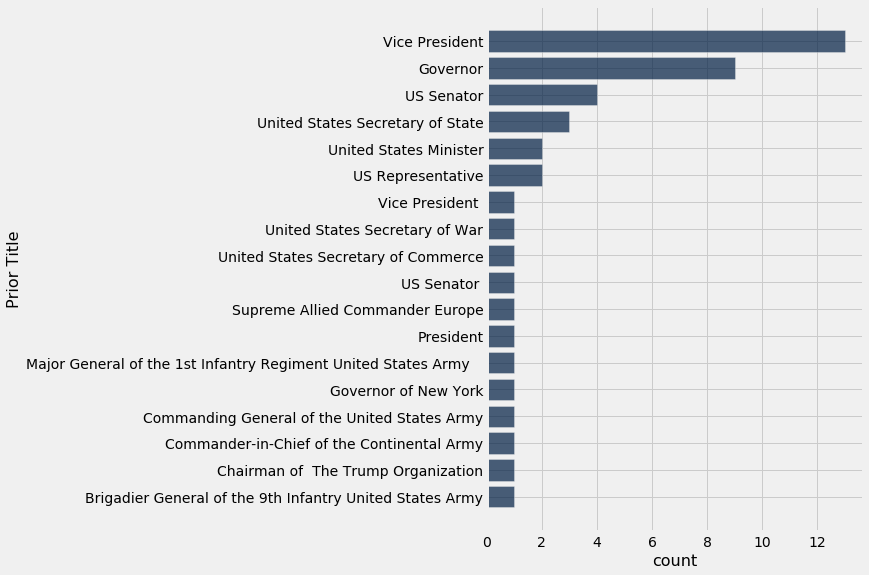

In [28]:
prior_count.sort('count', descending= True).barh("Prior Title", "count")

##### Now select the "President" and "Party" columns from the original us_presidents table. 

In [19]:
parties = us_presidents.select("President", "Party")
parties

President,Party
George Washington,Nonpartisan
John Adams,Federalist
Thomas Jefferson,Democratic- Republican
James Madison,Democratic- Republican
James Monroe,Democratic- Republican
John Quincy Adams,Democratic- Republican
Andrew Jackson,Democratic
Martin Van Buren,Democratic
William Henry Harrison,Whig
John Tyler,Whig


In [30]:
parties_count = parties.group("Party")
parties_count.show()

Party,count
Democratic,1
Democratic,15
Democratic- Republican,4
Federalist,1
Nonpartisan,1
Republican,19
Whig,4


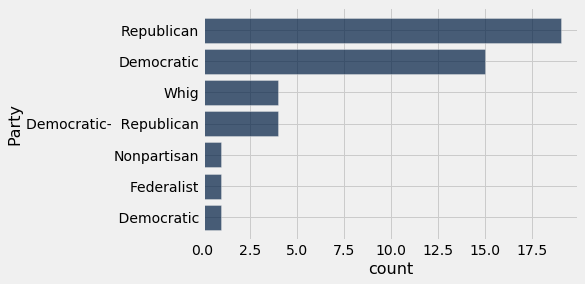

In [32]:
parties_count.sort('count', descending= True).barh("Party", "count")

## 3. Viewing and Manipulating Tables 

The next section will utilze the concepts learned above in context with the Global Terrorism Database. Created as a project under the University of Maryland, the GTD is ["is an open-source database including information on terrorist events around the world from 1970 through 2017 (with additional annual updates planned for the future). Unlike many other event databases, the GTD includes systematic data on domestic as well as transnational and international terrorist incidents that have occurred during this time period and now includes more than 180,000 cases. For each GTD incident, information is available on the date and location of the incident, the weapons used and nature of the target, the number of casualties, and--when identifiable--the group or individual responsible"](https://www.start.umd.edu/gtd/about/)

#### We will be using the information from the Global Terrorism Database to see how tables can be used to visualize data. 

###### Trigger warning: the data below contains sensitive information about terrorist attacks, not limited to but including location of the attack, the date, the groups targeted, and the attack type. Please let us know if you are uncomfortable with the material and we will provide an alternate exercise that uses the exact same content below, but with a different data set.

In [15]:
GTD_1990_1995 = Table.read_table("gtd_90to95.csv")
GTD_1990_1995

/srv/app/venv/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (3,30,58,91,93) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


iyear,imonth,iday,approxdate,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
1990,1,0,nan,110,Lebanon,10,Middle East & North Africa,Beirut,Beirut,33.8885,35.5035,1,0,nan,nan,1,1,1,-9,nan,nan,0,1,0,6,Hostage Taking (Kidnapping),nan,nan,nan,nan,10,Journalists & Media,53,Newspaper Journalist/Staff/Facility,Editors Assoc.,Journalist George Hajj,110,Lebanon,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Unknown,nan,nan,nan,nan,nan,nan,0,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,5,Firearms,3,Handgun,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Pistol,0,nan,nan,0,nan,nan,0,nan,nan,nan,nan,1,1,0,nan,nan,nan,Lebanon,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,PGIS,-9,-9,0,-9,nan
1990,1,1,nan,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.0837,74.7899,1,0,nan,nan,1,1,1,0,nan,nan,0,1,0,3,Bombing/Explosion,nan,nan,nan,nan,2,Government (General),15,Politician or Political Party Movement/Meeting/Rally,Govt,State Legislative Building,92,India,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Unknown,nan,nan,nan,nan,nan,nan,0,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6,Explosives,16,Unknown Explosive Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Explosive,0,nan,nan,0,nan,nan,1,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,PGIS,-9,-9,0,-9,nan
1990,1,1,nan,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.0837,74.7899,1,0,nan,nan,1,1,1,-9,nan,nan,0,1,0,3,Bombing/Explosion,nan,nan,nan,nan,1,Business,5,Industrial/Textiles/Factory,State electrical company,Office Complex,92,India,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Unknown,nan,nan,nan,nan,nan,nan,0,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6,Explosives,16,Unknown Explosive Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Explosive,0,nan,nan,0,nan,nan,1,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,PGIS,-9,-9,0,-9,nan
1990,1,1,nan,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.0837,74.7899,1,0,nan,nan,1,1,1,0,nan,nan,0,1,0,3,Bombing/Explosion,nan,nan,nan,nan,19,Transportation,99,Bus (excluding tourists),Bus Co.,Bus,92,India,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Unknown,nan,nan,nan,nan,nan,nan,0,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,6,Explosives,16,Unknown Explosive Type,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,Explosive,0,nan,nan,0,nan,nan,1,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,PGIS,-9,-9,0,-9,nan
1990,1,1,nan,26,Bolivia,3,South America,Cochabamba,Cochabamba,-17.3828,-66.1664,1,0,nan,nan,1

This is a lot of data! Using the num_rows() and num_columns we can see exactly how many points are in this dataset.

#### num_rows()

In [16]:
GTD_1990_1995.num_rows

20178

#### num_columns()

In [17]:
GTD_1990_1995.num_columns

132

As we can see, the dataset has a lot of columns and rows. As many of the rows don't contain numerical values, we will be taking them out for our lab's purposes. (Feel free to review the GTD on your own time though if you're interested in doing more with the collected data!)

### 2.1 Save the table with the following columns: "iyear", "imonth", "iday", "country", "country_txt", "region", "region_txt", "provstate", "city", "latitude", "longitude", "attacktype1_txt", "targtype1_txt", "corp1"

In [35]:
GTD_1990_1995 = GTD_1990_1995.select("iyear", "imonth", "iday",
                                     "country", "country_txt",
                                     "region", "region_txt", "provstate",
                                     "city", "latitude", "longitude",
                                     "attacktype1_txt", "targtype1_txt", "corp1")
GTD_1990_1995

iyear,imonth,iday,country,country_txt,region,region_txt,provstate,city,latitude,longitude,attacktype1_txt,targtype1_txt,corp1
1990,1,0,110,Lebanon,10,Middle East & North Africa,Beirut,Beirut,33.8885,35.5035,Hostage Taking (Kidnapping),Journalists & Media,Editors Assoc.
1990,1,1,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.0837,74.7899,Bombing/Explosion,Government (General),Govt
1990,1,1,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.0837,74.7899,Bombing/Explosion,Business,State electrical company
1990,1,1,92,India,6,South Asia,Jammu and Kashmir,Srinagar,34.0837,74.7899,Bombing/Explosion,Transportation,Bus Co.
1990,1,1,26,Bolivia,3,South America,Cochabamba,Cochabamba,-17.3828,-66.1664,Bombing/Explosion,Religious Figures/Institutions,Mormon church
1990,1,1,145,Nicaragua,2,Central America & Caribbean,North Caribbean Coast Autonomous Region,Puerto Cabezas district,14.2337,-83.5389,Assassination,Religious Figures/Institutions,Catholic Church
1990,1,1,97,Israel,10,Middle East & North Africa,Tel Aviv,Tel Aviv,32.083,34.8119,Assassination,Government (General),Govt.
1990,1,1,26,Bolivia,3,South America,Santa Cruz,Santa Cruz,-17.7832,-63.182,Bombing/Explosion,Business,Tesoro Petroleum Co.
1990,1,2,45,Colombia,3,South America,Cundinamarca,Unknown,5.026,-74.03,Armed Assault,Police,Police
1990,1,2,159,Peru,3,South America,Unknown,Amnaija,nan,nan,Armed Assault,Police,Police
